In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [3]:
df = yf.download('SQ', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


calculating bollinger bands


<AxesSubplot: xlabel='Date'>

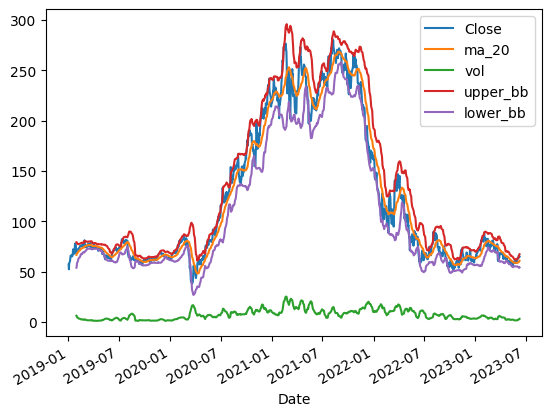

In [4]:
print('calculating bollinger bands')
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2*df.vol)
df['lower_bb'] = df.ma_20 - (2*df.vol)

#print(df)
df[['Close', 'ma_20', 'vol', 'upper_bb', 'lower_bb']].plot()

In [5]:
print('calculating rsi...')
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

conditions = [(df.rsi < 30) & (df.Close < df.lower_bb),
              (df.rsi > 70) & (df.Close > df.upper_bb)]
choices = ['Buy', 'Sell']
df['signal'] = np.select(conditions, choices)

calculating rsi...


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN,NaN,0
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN,NaN,0
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN,NaN,0
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN,NaN,0
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05,63.709999,64.000000,62.573002,63.540001,63.540001,5880700,59.3465,2.284838,63.916177,54.776823,74.134817,0
2023-06-06,62.360001,66.180000,62.209999,65.980003,65.980003,10479600,59.7055,2.717549,65.140597,54.270403,82.255292,Sell
2023-06-07,66.500000,67.610001,65.110001,66.239998,66.239998,9270900,60.0515,3.081977,66.215454,53.887546,82.940144,Sell


In [7]:
print('this will contain signals')
df.dropna(inplace=True)
df.signal = df.signal.shift()
df['shifted_Close'] = df.Close.shift()

this will contain signals


In [8]:
df


,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal,shifted_Close
Date,,,,,,,,,,,,,
2019-01-30,71.010002,71.599998,68.720001,71.529999,71.529999,18710400,66.6595,6.321133,79.301766,54.017234,53.228844,None,NaN
2019-01-31,70.029999,73.860001,69.980003,71.349998,71.349998,15679400,67.3670,5.989839,79.346678,55.387322,52.662931,0,71.529999
2019-02-01,71.050003,71.279999,69.720001,70.800003,70.800003,12677800,68.2860,4.883736,78.053472,58.518528,50.687025,0,71.349998
2019-02-04,71.000000,72.620003,70.400002,71.750000,71.750000,10582100,68.9645,4.315380,77.595259,60.333741,54.245314,0,70.800003
2019-02-05,73.000000,75.169998,72.269997,72.279999,72.279999,19150500,69.5425,3.907931,77.358362,61.726637,56.353753,0,71.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05,63.709999,64.000000,62.573002,63.540001,63.540001,5880700,59.3465,2.284838,63.916177,54.776823,74.134817,Sell,63.459999
2023-06-06,62.360001,66.180000,62.209999,65.980003,65.980003,10479600,59.7055,2.717549,65.140597,54.270403,82.255292,0,63.540001
2023-06-07,66.500000,67.610001,65.110001,66.239998,66.239998,9270900,60.0515,3.081977,66.215454,53.887546,82.940144,Sell,65.980003


In [9]:
position = False
buydate, selldates = [],[]
buyprices, sellprices = [],[]


In [10]:
for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydate.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close < 0.95 * buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False

NameError: name 'buydates' is not defined

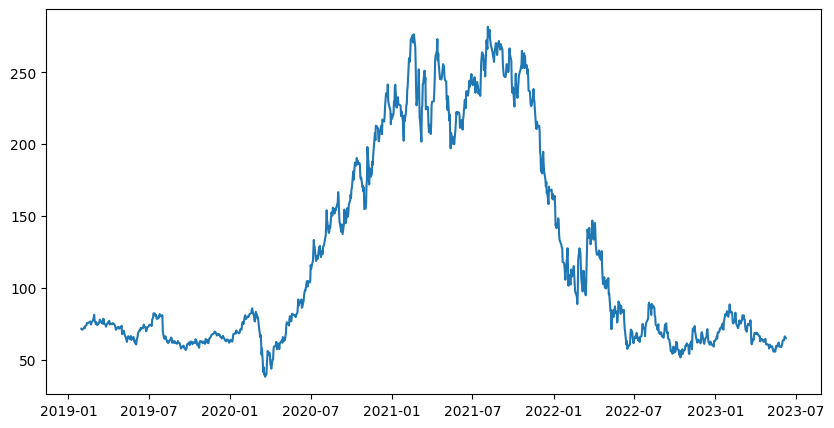

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='<', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='>', c='r')

NameError: name 'buydates' is not defined

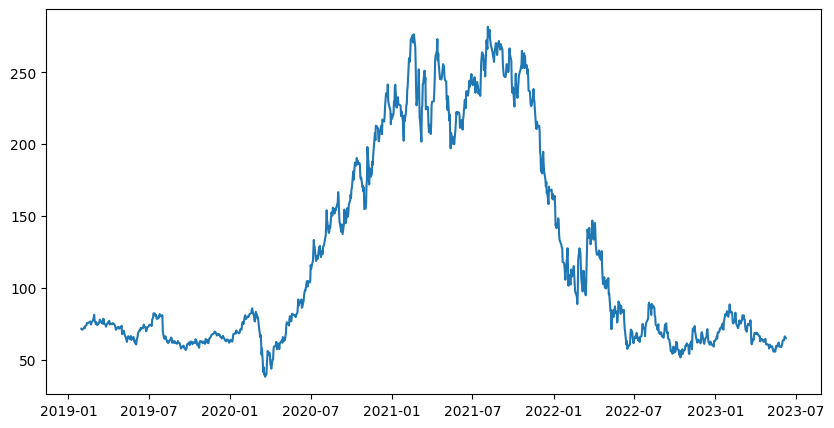

In [12]:
position = False
buydate, selldates = [],[]
buyprices, sellprices = [],[]

for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydate.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close < 0.95 * buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False
        
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='^', c='r')

[*********************100%***********************]  1 of 1 completed
calculating bollinger bands
calculating rsi...
this will contain signals


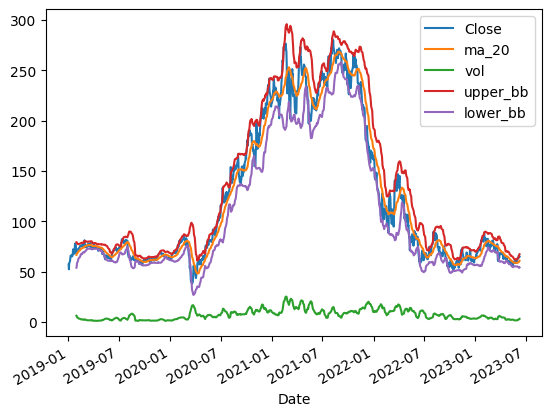

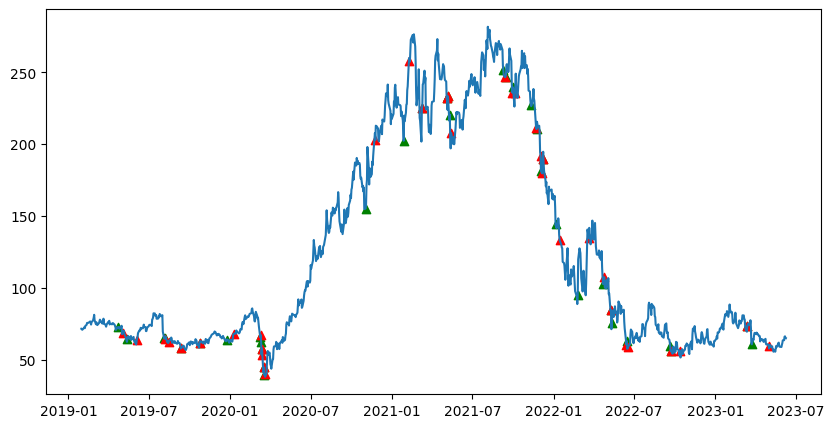

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

df = yf.download('SQ', start='2019-01-01')

print('calculating bollinger bands')
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2*df.vol)
df['lower_bb'] = df.ma_20 - (2*df.vol)

#print(df)
df[['Close', 'ma_20', 'vol', 'upper_bb', 'lower_bb']].plot()

print('calculating rsi...')
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

conditions = [(df.rsi < 30) & (df.Close < df.lower_bb),
              (df.rsi > 70) & (df.Close > df.upper_bb)]
choices = ['Buy', 'Sell']
df['signal'] = np.select(conditions, choices)

print('this will contain signals')
df.dropna(inplace=True)
df.signal = df.signal.shift()
df['shifted_Close'] = df.Close.shift()

position = False
buydate, selldates = [],[]
buyprices, sellprices = [],[]

for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydate.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close < 0.98 * buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False
        
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydate].index, df.loc[buydate].Close, marker='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='^', c='r')

In [20]:
(pd.Series([(sell - buy) / buy for sell, buy in zip(sellprices,buyprices)]) + 1).prod() - 1

0.11542742659850624